In [24]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [25]:
print(os.listdir('C:\\Users\\ibrad\\Downloads\\Personal Projects\\Intrusion Detection System'))

['kddcup.data_10_percent', 'kddcup.names', 'main-checkpoint.ipynb', 'main-script.ipynb', 'test_accuracy_figure.png', 'test_time_figure.png', 'training_accuracy_figure.png', 'training_attack_types.txt', 'train_time_figure.png', 'typo-correction.txt']


In [26]:
with open("C:\\Users\\ibrad\\Downloads\\Personal Projects\\Intrusion Detection System\\kddcup.names",'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [27]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
#print(columns)
print(len(columns))

42


In [ ]:
with open("C:\\Users\\ibrad\\Downloads\\Personal Projects\\Intrusion Detection System\\training_attack_types.TXT",'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [ ]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}


READING DATASET

In [32]:
path = "C:\\Users\\ibrad\\Downloads\\Personal Projects\\Intrusion Detection System\\kddcup.data_10_percent\\kddcup.data_10_percent_corrected"
df = pd.read_csv(path,names=columns)

#Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [33]:
df.shape

(494021, 43)

In [34]:
df['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

In [35]:
df['Attack Type'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: Attack Type, dtype: int64

In [36]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

DATA PREPROCESSING

In [37]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [38]:
#Finding categorical features
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['flag', 'protocol_type', 'service']

CATEGORICAL FEATURES DISTRIBUTION

In [39]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

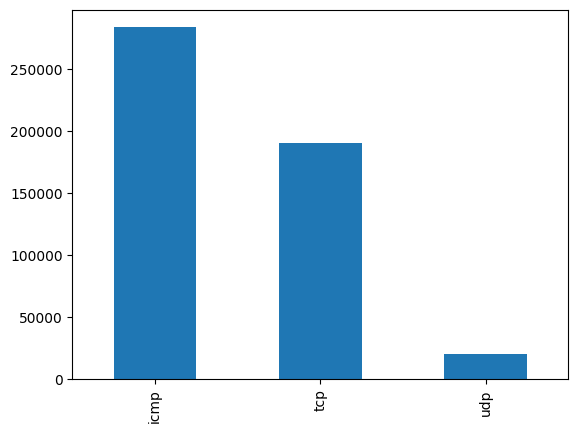

In [40]:
bar_graph('protocol_type')

Protocol type: We notice that ICMP is the most present in the used data, then TCP and almost 20000 packets of UDP type

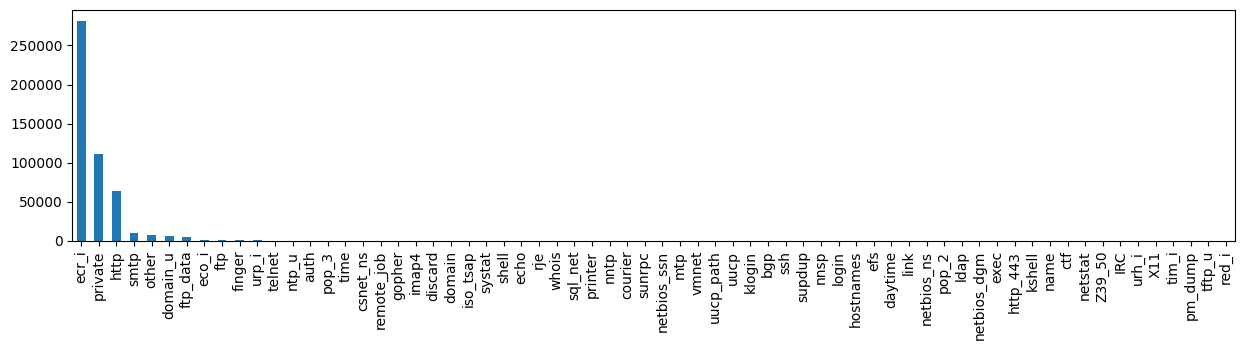

In [41]:
plt.figure(figsize=(15,3))
bar_graph('service')

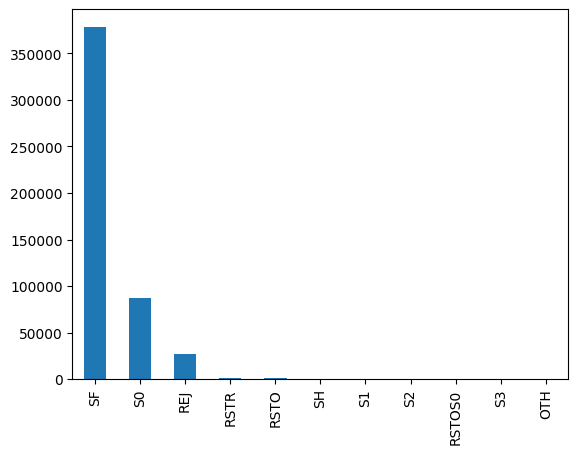

In [42]:
bar_graph('flag')

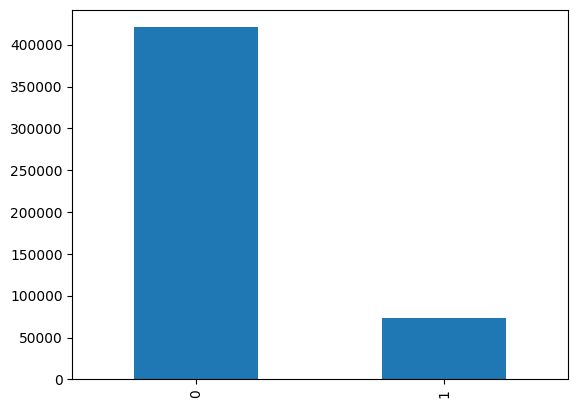

In [43]:
bar_graph('logged_in')

logged_in (1 if successfully logged in; 0 otherwise): We notice that just 70000 packets are successfully logged in.

TARGET FEATURE DISTRIBUTION

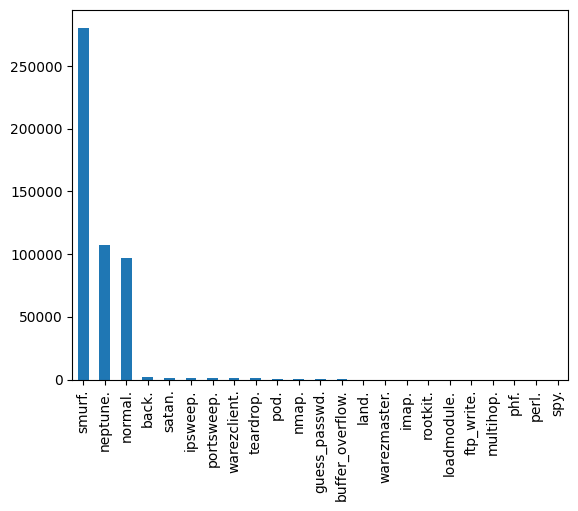

In [44]:
bar_graph('target')

Attack Type(The attack types grouped by attack, it's what we will predict)

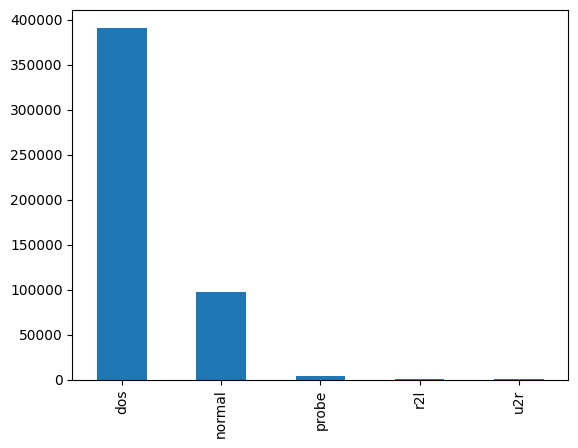

In [45]:
bar_graph('Attack Type')

In [46]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

DATA CORRELATION

C:\Users\ibrad\AppData\Local\Temp\ipykernel_15532\4162482413.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')# drop columns with NaN
C:\Users\ibrad\AppData\Local\Temp\ipykernel_15532\4162482413.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


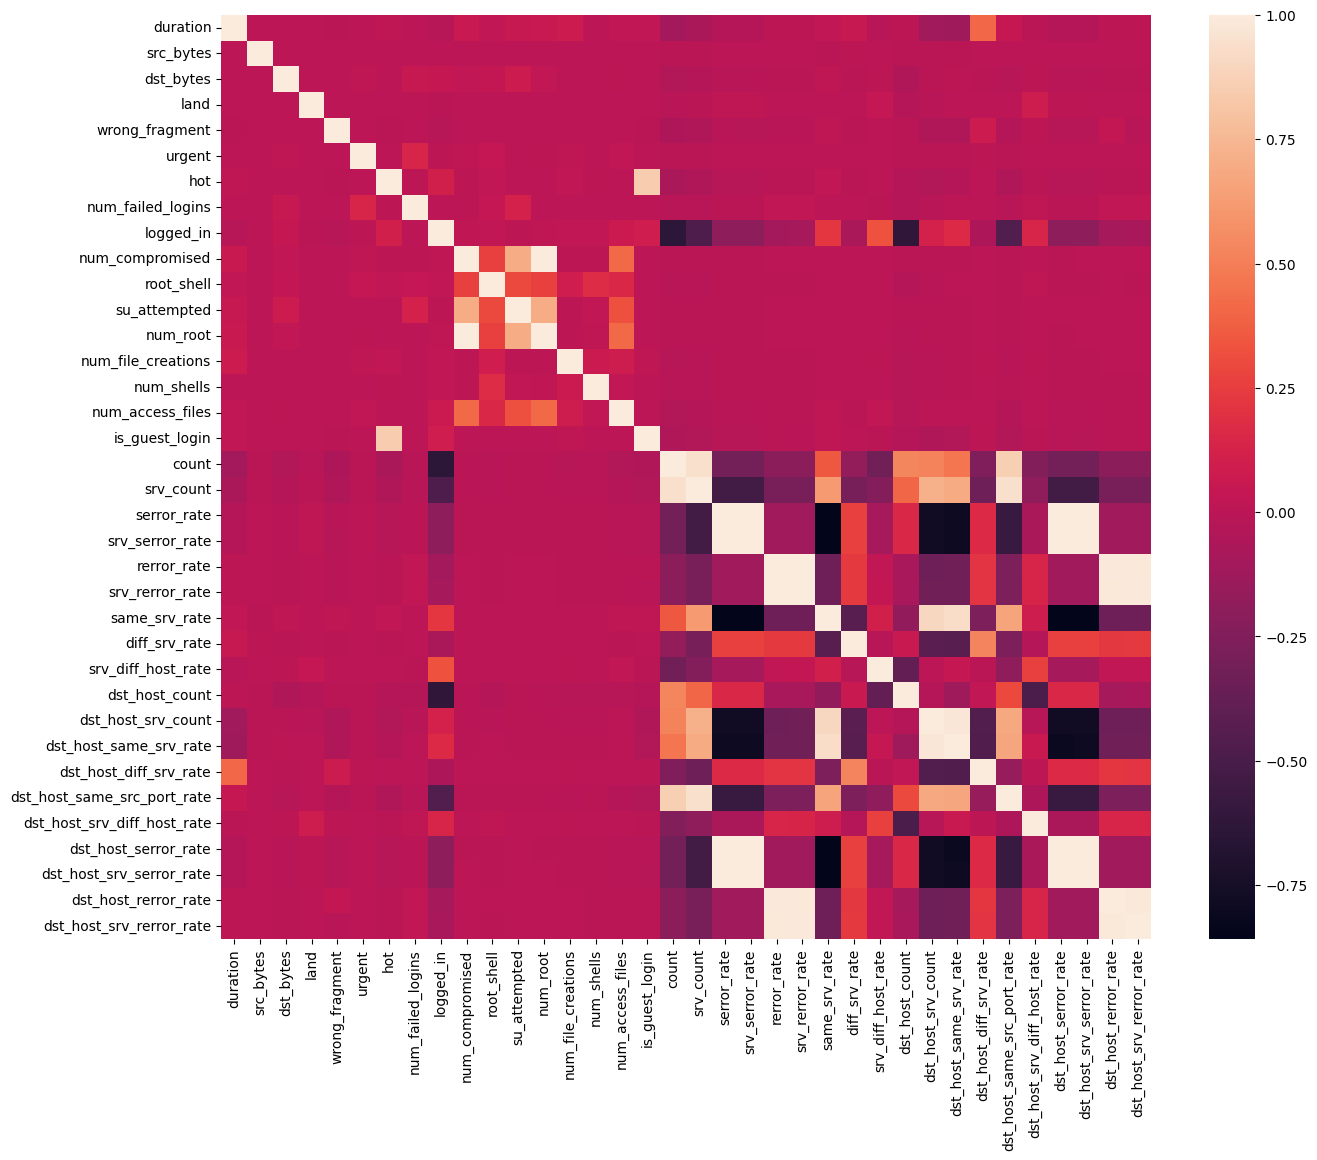

In [47]:
df = df.dropna('columns')# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [48]:
df['num_root'].corr(df['num_compromised'])

0.9938277978737942

In [49]:
df['srv_serror_rate'].corr(df['serror_rate'])

0.998361507272552

In [50]:
df['srv_count'].corr(df['count'])

0.9436670688882602

In [51]:
df['srv_rerror_rate'].corr(df['rerror_rate'])

0.9947309539818258

In [52]:
df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count'])

0.9736854572954081

In [53]:
df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate'])

0.9981559173372515

In [54]:
df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate'])

0.9848038371110593

In [55]:
df['dst_host_same_srv_rate'].corr(df['same_srv_rate'])

0.927808034269101

In [56]:
df['dst_host_srv_count'].corr(df['same_srv_rate'])

0.8989546630324231

In [57]:
df['dst_host_same_src_port_rate'].corr(df['srv_count'])

0.9449263676783239

In [58]:
df['dst_host_serror_rate'].corr(df['serror_rate'])

0.998672968010501

In [59]:
df['dst_host_serror_rate'].corr(df['srv_serror_rate'])

0.997835300373953

In [60]:
df['dst_host_srv_serror_rate'].corr(df['serror_rate'])

0.9978492485679238

In [61]:
df['dst_host_srv_serror_rate'].corr(df['srv_serror_rate'])

0.9993041091850208

In [62]:
df['dst_host_rerror_rate'].corr(df['rerror_rate'])

0.9869947924955924

In [63]:
df['dst_host_rerror_rate'].corr(df['srv_rerror_rate'])

0.9821663427308904

In [64]:
df['dst_host_srv_rerror_rate'].corr(df['rerror_rate'])

0.9851995540751091

In [65]:
df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate'])

0.9865705438845588

In [66]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with dst_host_srv_count and should be ignored for analysis.
#(Correlation = 0.9865705438845669)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [67]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [68]:
df.shape

(494021, 33)

In [69]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'target',
       'Attack Type'],
      dtype='object')

In [70]:
df_std = df.std()
df_std = df_std.sort_values(ascending = True)
df_std

C:\Users\ibrad\AppData\Local\Temp\ipykernel_15532\1261043509.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_std = df.std()


urgent                              0.005510
land                                0.006673
su_attempted                        0.007793
root_shell                          0.010551
num_shells                          0.011020
num_failed_logins                   0.015520
num_access_files                    0.036482
is_guest_login                      0.037211
dst_host_srv_diff_host_rate         0.042133
diff_srv_rate                       0.082205
num_file_creations                  0.096416
dst_host_diff_srv_rate              0.109259
wrong_fragment                      0.134805
srv_diff_host_rate                  0.142397
rerror_rate                         0.231623
logged_in                           0.355345
serror_rate                         0.380717
same_srv_rate                       0.388189
dst_host_same_src_port_rate         0.481309
hot                                 0.782103
num_compromised                     1.798326
dst_host_count                     64.745380
dst_host_s

FEATURE MAPPING

In [71]:
df['protocol_type'].value_counts()

icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

In [72]:
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [73]:
df['flag'].value_counts()

SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

In [74]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [75]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,http,0,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,http,0,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,http,0,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,http,0,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,http,0,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [76]:
df.drop('service',axis = 1,inplace= True)

In [77]:
df.shape

(494021, 32)

In [78]:
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,0,181,5450,0,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,0,239,486,0,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,0,235,1337,0,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,0,219,1337,0,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,0,217,2032,0,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [79]:
df['Attack Type'].unique()

array(['normal', 'u2r', 'dos', 'r2l', 'probe'], dtype=object)

In [80]:
df.dtypes

duration                         int64
protocol_type                    int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count           

MODELLING

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [82]:
df = df.drop(['target',], axis=1)
print(df.shape)

# Target variable and train set
Y = df[['Attack Type']]
X = df.drop(['Attack Type',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(494021, 31)


(330994, 30) (163027, 30)
(330994, 1) (163027, 1)


GAUSSIAN NAIVE BAYES

In [83]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [84]:
model1 = GaussianNB()

In [85]:
start_time = time.time()
model1.fit(X_train, Y_train.values.ravel())
end_time = time.time()
m1_traintime=end_time-start_time

In [86]:
print("Training time: ",m1_traintime)

Training time:  1.2116672992706299


In [87]:
start_time = time.time()
Y_test_pred1 = model1.predict(X_test)
end_time = time.time()
m1_testtime=end_time-start_time

In [88]:
print("Testing time: ",m1_testtime)

Testing time:  1.2007129192352295


In [89]:
print("Train score is:", model1.score(X_train, Y_train))
print("Test score is:",model1.score(X_test,Y_test))

Train score is: 0.8795114110829804
Test score is: 0.8790384414851528


In [90]:
print(Y_test.value_counts)

<bound method DataFrame.value_counts of        Attack Type
317921         dos
171422         dos
312181         dos
87346       normal
57449          dos
...            ...
351572         dos
378352         dos
33349       normal
119307         dos
332656         dos

[163027 rows x 1 columns]>


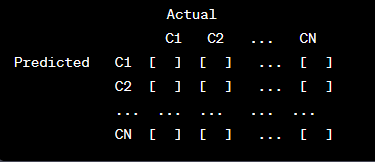

The confusion matrix is 
[[121276    620   7108      5     97]
 [  2878  20540   6117    313   2319]
 [    13      2   1329      1      3]
 [     0      3      4    148    232]
 [     0      0      2      3     14]]


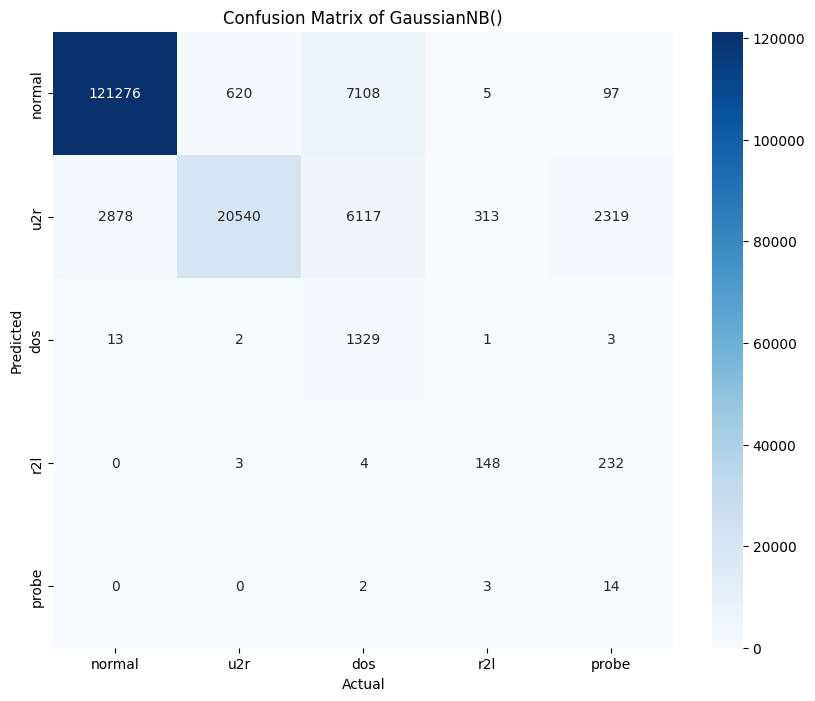

In [91]:
#confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


cm = confusion_matrix(Y_test, Y_test_pred1)
print("The confusion matrix is ")
print(cm)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['normal', 'u2r', 'dos', 'r2l', 'probe'], yticklabels=['normal', 'u2r', 'dos', 'r2l', 'probe'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Confusion Matrix of {model1}')
plt.show()

DECISION TREE

In [92]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier

In [93]:
model2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [94]:
start_time = time.time()
model2.fit(X_train, Y_train.values.ravel())
end_time = time.time()
m2_traintime=end_time-start_time

In [95]:
print("Training time: ",m2_traintime)

Training time:  1.747654914855957


In [96]:
start_time = time.time()
Y_test_pred2 = model2.predict(X_test)
end_time = time.time()
m2_testtime=end_time-start_time

In [97]:
print("Testing time: ",m2_testtime)

Testing time:  0.03883695602416992


In [98]:
print("Train score is:", model2.score(X_train, Y_train))
print("Test score is:",model2.score(X_test,Y_test))

Train score is: 0.9905829108684749
Test score is: 0.9905230421954646


The confusion matrix is 
[[128775    261     70      0      0]
 [     5  31510    652      0      0]
 [     8    143   1197      0      0]
 [     0    157    230      0      0]
 [     0     18      1      0      0]]


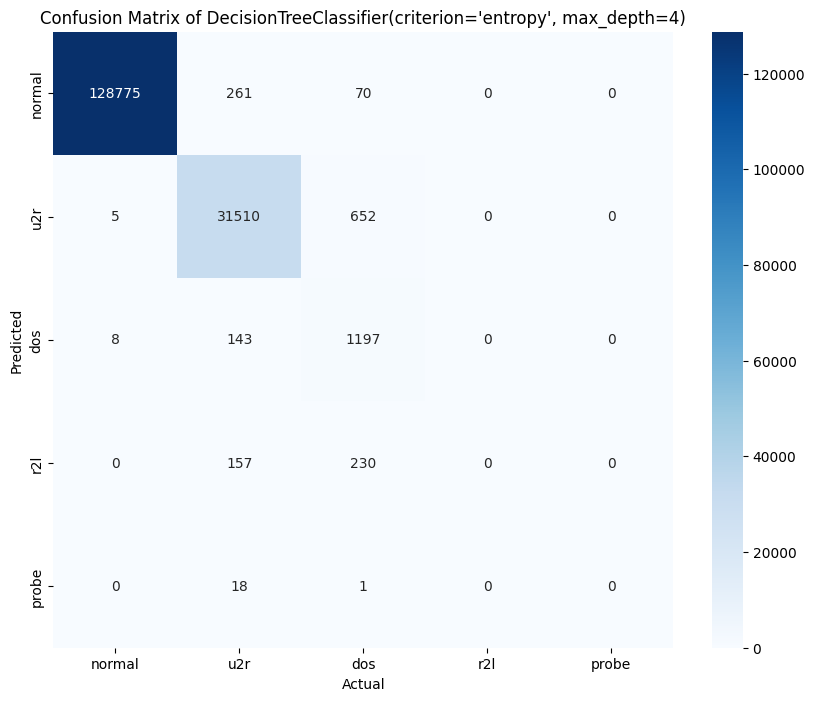

In [99]:
cm = confusion_matrix(Y_test, Y_test_pred2)
print("The confusion matrix is ")
print(cm)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['normal', 'u2r', 'dos', 'r2l', 'probe'], yticklabels=['normal', 'u2r', 'dos', 'r2l', 'probe'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Confusion Matrix of {model2}')
plt.show()

RANDOM FOREST

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
model3 = RandomForestClassifier(n_estimators=30)

In [102]:
start_time = time.time()
model3.fit(X_train, Y_train.values.ravel())
end_time = time.time()
m3_traintime=end_time-start_time

In [103]:
print("Training time: ",m3_traintime)

Training time:  13.79257321357727


In [104]:
start_time = time.time()
Y_test_pred3 = model3.predict(X_test)
end_time = time.time()
m3_testtime=end_time-start_time

In [105]:
print("Testing time: ",m3_testtime)

Testing time:  0.6460921764373779


In [106]:
print("Train score is:", model3.score(X_train, Y_train))
print("Test score is:",model3.score(X_test,Y_test))

Train score is: 0.99997583037759
Test score is: 0.9996749004766081


The confusion matrix is 
[[129105      1      0      0      0]
 [     1  32157      5      4      0]
 [     1     20   1327      0      0]
 [     1     12      0    373      1]
 [     0      6      0      1     12]]


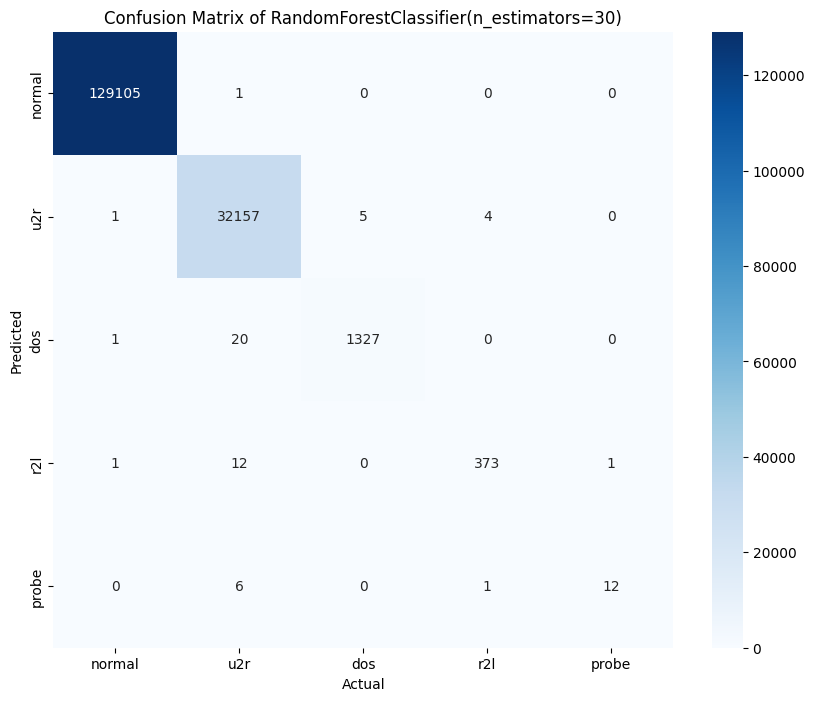

In [107]:
cm = confusion_matrix(Y_test, Y_test_pred3)
print("The confusion matrix is ")
print(cm)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['normal', 'u2r', 'dos', 'r2l', 'probe'], yticklabels=['normal', 'u2r', 'dos', 'r2l', 'probe'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Confusion Matrix of {model3}')
plt.show()

SUPPORT VECTOR MACHINE

In [108]:
from sklearn.svm import SVC

In [109]:
model4 = SVC(gamma = 'scale')

In [110]:
start_time = time.time()
model4.fit(X_train, Y_train.values.ravel())
end_time = time.time()
m4_traintime=end_time-start_time

In [111]:
print("Training time: ",m4_traintime)

Training time:  175.7593593597412


In [112]:
start_time = time.time()
Y_test_pred4 = model4.predict(X_test)
end_time = time.time()
m4_testtime=end_time-start_time

In [113]:
print("Testing time: ",m4_testtime)

Testing time:  1856.6512467861176


In [114]:
print("Train score is:", model4.score(X_train, Y_train))
print("Test score is:", model4.score(X_test,Y_test))

Train score is: 0.9987552644458811
Test score is: 0.9987916112055059


The confusion matrix is 
[[129097      8      0      1      0]
 [    28  32086     11     40      2]
 [     1     50   1297      0      0]
 [     1     46      1    338      1]
 [     0      3      0      4     12]]


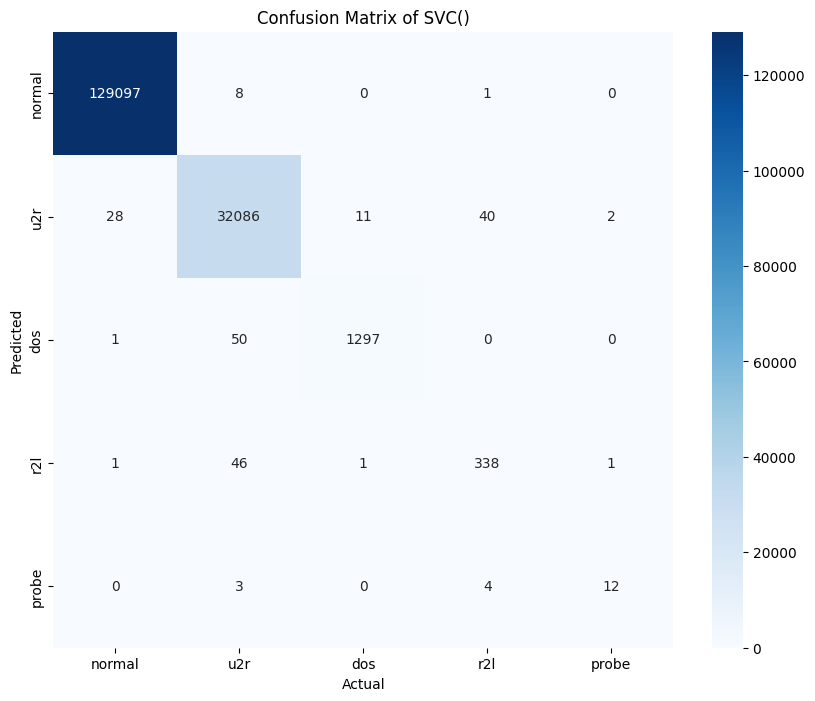

In [115]:
cm = confusion_matrix(Y_test, Y_test_pred4)
print("The confusion matrix is ")
print(cm)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['normal', 'u2r', 'dos', 'r2l', 'probe'], yticklabels=['normal', 'u2r', 'dos', 'r2l', 'probe'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Confusion Matrix of {model4}')
plt.show()

LOGISTIC REGRESSION

In [116]:
from sklearn.linear_model import LogisticRegression

In [117]:
model5 = LogisticRegression(max_iter=1200000)

In [118]:
start_time = time.time()
model5.fit(X_train, Y_train.values.ravel())
end_time = time.time()
m5_traintime=end_time-start_time

In [119]:
print("Training time: ",m5_traintime)

Training time:  30.55572009086609


In [120]:
start_time = time.time()
Y_test_pred5 = model5.predict(X_test)
end_time = time.time()
m5_testtime=end_time-start_time

In [121]:
print("Testing time: ",m5_testtime)

Testing time:  0.9729001522064209


In [122]:
print("Train score is:", model5.score(X_train, Y_train))
print("Test score is:",model5.score(X_test,Y_test))

Train score is: 0.9935285835997028
Test score is: 0.9935286792985211


The confusion matrix is 
[[128400    702      3      1      0]
 [    47  32045     22     53      0]
 [     5    141   1202      0      0]
 [     5     62      0    319      1]
 [     0      6      0      7      6]]


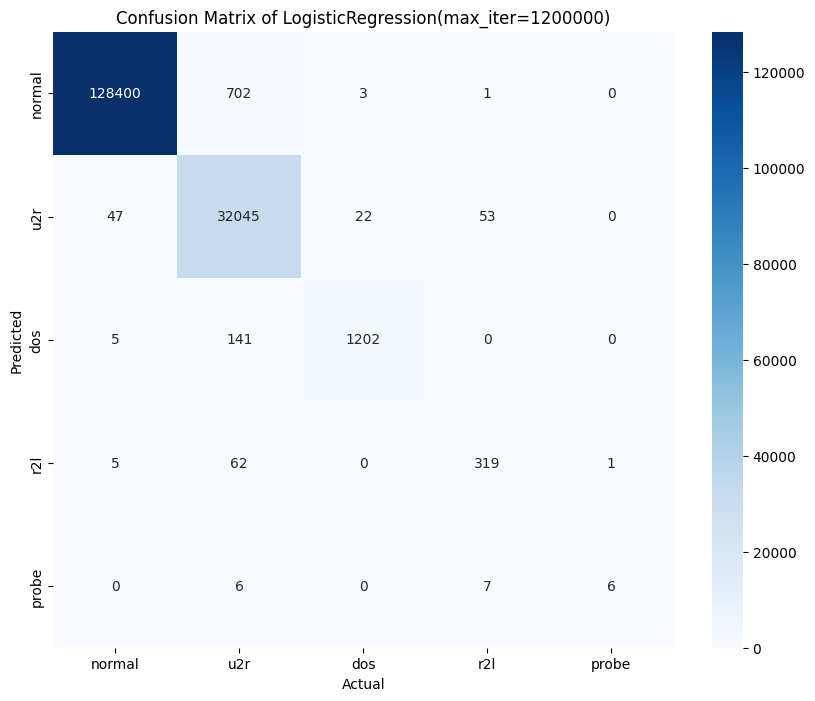

In [123]:
cm = confusion_matrix(Y_test, Y_test_pred5)
print("The confusion matrix is ")
print(cm)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['normal', 'u2r', 'dos', 'r2l', 'probe'], yticklabels=['normal', 'u2r', 'dos', 'r2l', 'probe'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Confusion Matrix of {model5}')
plt.show()

GRADIENT BOOSTING CLASSIFIER

In [124]:
from sklearn.ensemble import GradientBoostingClassifier

In [125]:
model6 = GradientBoostingClassifier(random_state=0)

In [126]:
start_time = time.time()
model6.fit(X_train, Y_train.values.ravel())
end_time = time.time()
m6_traintime=end_time-start_time

In [127]:
print("Training time: ",m6_traintime)

Training time:  398.0963935852051


In [128]:
start_time = time.time()
Y_test_pred6 = model6.predict(X_test)
end_time = time.time()
m6_testtime=end_time-start_time

In [129]:
print("Testing time: ",m6_testtime)

Testing time:  1.1634836196899414


In [130]:
print("Train score is:", model6.score(X_train, Y_train))
print("Test score is:", model6.score(X_test,Y_test))

Train score is: 0.9979304760811374
Test score is: 0.9977181693829856


The confusion matrix is 
[[129076     29      0      1      0]
 [     6  32125      8      7     21]
 [    11     40   1297      0      0]
 [     1    198      8    142     38]
 [     0      4      0      0     15]]


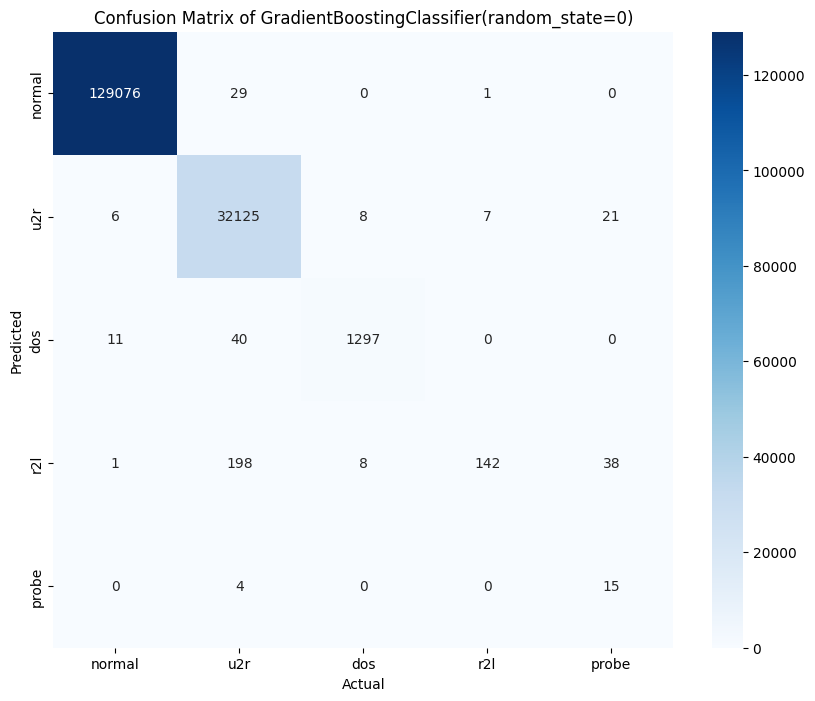

In [131]:
cm = confusion_matrix(Y_test, Y_test_pred6)
print("The confusion matrix is ")
print(cm)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['normal', 'u2r', 'dos', 'r2l', 'probe'], yticklabels=['normal', 'u2r', 'dos', 'r2l', 'probe'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Confusion Matrix of {model6}')
plt.show()

Artificial Neural Network

In [139]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [140]:
def fun():
    model = Sequential()
    
    #here 30 is output dimension
    model.add(Dense(30,input_dim =30,activation = 'relu',kernel_initializer='random_uniform'))
    
    #in next layer we do not specify the input_dim as the model is sequential so output of previous layer is input to next layer
    model.add(Dense(1,activation='sigmoid',kernel_initializer='random_uniform'))
    
    #5 classes-normal,dos,probe,r2l,u2r
    model.add(Dense(5,activation='softmax'))
    
    #loss is categorical_crossentropy which specifies that we have multiple classes
    
    model.compile(loss ='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    
    return model

In [141]:
#Since,the dataset is very big and we cannot fit complete data at once so we use batch size.
#This divides our data into batches each of size equal to batch_size.
#Now only this number of samples will be loaded into memory and processed. 
#Once we are done with one batch it is flushed from memory and the next batch will be processed.
model7 = KerasClassifier(build_fn=fun,epochs=100,batch_size=64)

C:\Users\ibrad\AppData\Local\Temp\ipykernel_15532\3976402112.py:5: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model7 = KerasClassifier(build_fn=fun,epochs=100,batch_size=64)


In [148]:
start = time.time()
model7.fit(X_train, Y_train.values.ravel())
end = time.time()
m7_traintime=end-start

ModuleNotFoundError: No module named 'keras.src.engine.base_layer_v1'

In [149]:
print('Training time')
print((m7_traintime))

Training time


NameError: name 'm7_traintime' is not defined

In [ ]:
start_time = time.time()
Y_test_pred7 = model7.predict(X_test)
end_time = time.time()
m7_testtime=end_time-start_time

 140/5095 [..............................] - ETA: 12s

5095/5095 [==============================] - 9s 2ms/step


In [ ]:
print("Testing time: ",m6_testtime)

Testing time:  1.9657413959503174


In [ ]:
start_time = time.time()
Y_train_pred7 = model7.predict(X_train)
end_time = time.time()

  207/10344 [..............................] - ETA: 22s

10344/10344 [==============================] - 18s 2ms/step


In [ ]:
accuracy_score(Y_train,Y_train_pred7)

0.9971600693668163

In [ ]:
accuracy_score(Y_test,Y_test_pred7)

0.9968900856913272

The confusion matrix is 
[[129051      6     49      0      0]
 [     7  32121     29     10      0]
 [     6     41   1300      1      0]
 [     0    109    230     48      0]
 [     1     10      8      0      0]]


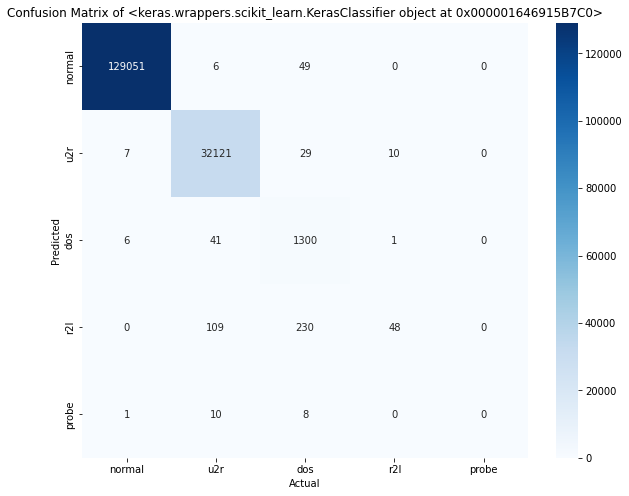

In [ ]:
cm = confusion_matrix(Y_test, Y_test_pred7)
print("The confusion matrix is ")
print(cm)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['normal', 'u2r', 'dos', 'r2l', 'probe'], yticklabels=['normal', 'u2r', 'dos', 'r2l', 'probe'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Confusion Matrix of {model7}')
plt.show()

TRAINING ACCURACY

<BarContainer object of 7 artists>

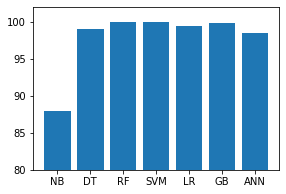

In [ ]:
names = ['NB','DT','RF','SVM','LR','GB','ANN']
values = [87.951,99.058,99.997,99.875,99.352,99.793,98.485]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(80,102)
plt.bar(names,values)

In [ ]:
f.savefig('training_accuracy_figure.png',bbox_inches='tight')

TESTING ACCURACY

<BarContainer object of 7 artists>

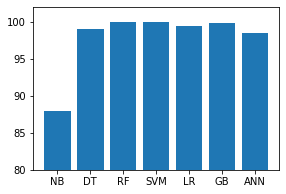

In [ ]:
names = ['NB','DT','RF','SVM','LR','GB','ANN']
values = [87.903,99.052,99.969,99.879,99.352,99.771,98.472]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(80,102)
plt.bar(names,values)

In [ ]:
f.savefig('test_accuracy_figure.png',bbox_inches='tight')

TRAINING TIME

<BarContainer object of 7 artists>

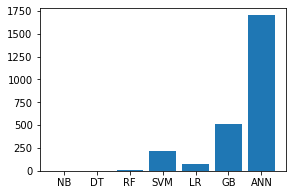

In [ ]:
names = ['NB','DT','RF','SVM','LR','GB','ANN']
values = [m1_traintime,m2_traintime,m3_traintime,m4_traintime,m5_traintime,m6_traintime,m7_traintime]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.bar(names,values)

In [ ]:
f.savefig('train_time_figure.png',bbox_inches='tight')

TESTING TIME

<BarContainer object of 7 artists>

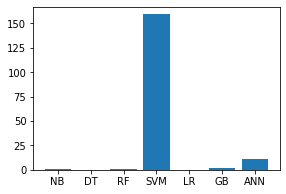

In [ ]:
names = ['NB','DT','RF','SVM','LR','GB','ANN']
values = [m1_testtime,m2_testtime,m3_testtime,m4_testtime,m5_testtime,m6_testtime,m7_testtime]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.bar(names,values)

In [ ]:
f.savefig('test_time_figure.png',bbox_inches='tight')